In [889]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 150)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [890]:
house_price = pd.read_csv(r'C:\Users\Admin\Downloads\Jupiter Notebook Python\Advanced Regression Assignment\train.csv')
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [891]:
# Number of rows and columns in house price.
house_price.shape

(1460, 81)

In [892]:
# Find the number of null values in House Price dataset
house_price.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [893]:
# We have to drop some columns which contains large number of null values
drop_variables = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
house_price = house_price.drop(drop_variables, axis = 1)
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [894]:
# Now, find the number of rows and columns in the house price dataset, after droping some columns
house_price.shape

(1460, 75)

In [895]:
#Nnow, we have to deal with the null values
# As we can see that some columns contains null values.
house_price.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [896]:
# As mentioned in the Data Description file of columns, if some column value is NA, we have to replace that NA with
# specific value according to that column.
def replace_na(house_price, columnName, columnVal):
    house_price[columnName].fillna(columnVal, inplace=True)

In [897]:
# Now, replace values of Garage Columns( GarageType, GarageFinish, GarageQual, GarageCond) which contains NA with 'No Garage'
replace_na(house_price, 'GarageType', 'No Garage')
replace_na(house_price, 'GarageFinish', 'No Garage')
replace_na(house_price, 'GarageQual', 'No Garage')
replace_na(house_price, 'GarageCond', 'No Garage')

In [898]:
house_price.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [899]:
# Now, we can see that some values of columns regarding Basement( BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFinType2)
# contains null Values, so replace NA with 'No Basement'.
replace_na(house_price, 'BsmtQual', 'No Basement')
replace_na(house_price, 'BsmtCond', 'No Basement')
replace_na(house_price, 'BsmtExposure', 'No Basement')
replace_na(house_price, 'BsmtFinType1', 'No Basement')
replace_na(house_price, 'BsmtFinType2', 'No Basement')

In [900]:
house_price.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [901]:
# Also, we can see that MasVnrArea and MasVnrType contains null values, so replace null value of MasVnrType with 'None' and
# MasVnrArea with 0, as area is in square feets.
replace_na(house_price, 'MasVnrType', 'None')
replace_na(house_price, 'MasVnrArea', 0)

In [902]:
house_price.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [903]:
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [904]:
# Convert year related columns to number of years, to find how old the house is, or how many years ago that particular
# house was sold.
house_price['YearBuilt'] = 2020 - house_price['YearBuilt']
house_price['YearRemodAdd'] = 2020 - house_price['YearRemodAdd']
house_price['GarageYrBlt'] = 2020 - house_price['GarageYrBlt']
house_price['YrSold'] = 2020 - house_price['YrSold']

In [905]:
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,17.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,12,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,44.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,13,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,19.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,12,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,22.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,14,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,20.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,12,WD,Normal,250000


In [906]:
# Remove the null values from the column GarageYrBuilt
house_price = house_price[~house_price['GarageYrBlt'].isnull()]
house_price.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [907]:
# Drop the null value of Electrical column
house_price = house_price[~house_price['Electrical'].isnull()]
house_price.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [908]:
# Now, we have to plot a scatter plot to identify the patterns, so for that first identify the numeric columns.
house_price_numeric = house_price.select_dtypes(include=['float64','int64'])
num_vars = house_price_numeric.columns

In [909]:
num_vars

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [910]:
# Drop Id column as we dont need it.
house_price_numeric.drop('Id', axis = 1, inplace=True)
num_vars = house_price_numeric.columns
num_vars

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [911]:
# Now plot the scatter plot for numeric variables
def scatter_plot(xitem, yitem, df, row, col, plotnumber, title = ''):
    plt.subplot(row,col,plotnumber)
    ax = sns.scatterplot(x=xitem, y=yitem, data=df)
    plt.tight_layout()
    plt.title(title)

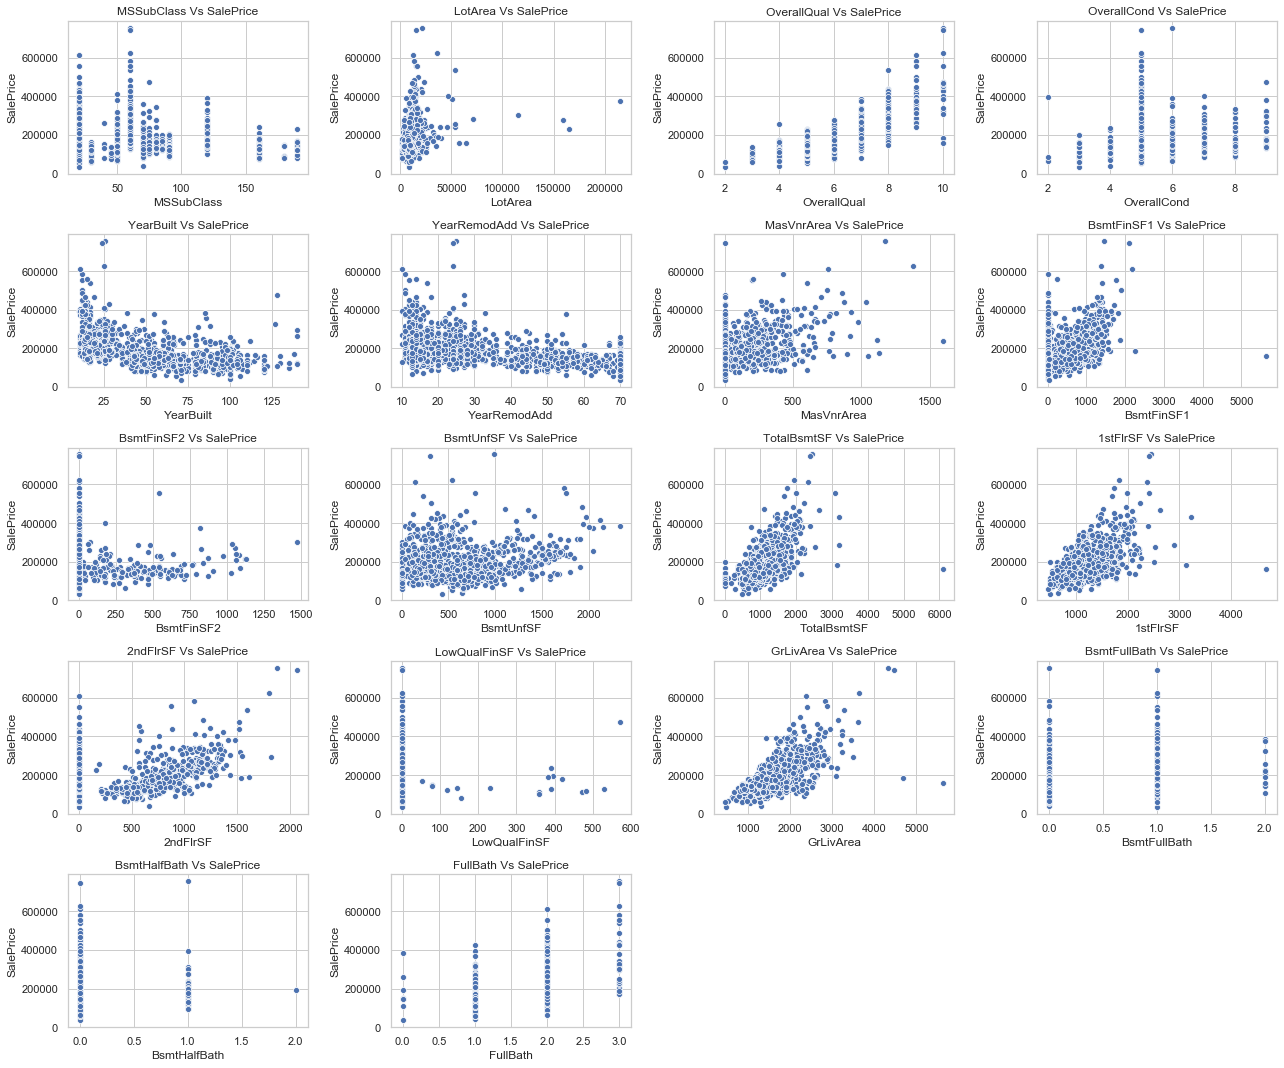

In [912]:
# Now, plot a scatter plot.
plt.figure(figsize=(18, 15))
for i in range(0, len(num_vars)//2):
    scatter_plot(num_vars[i], 'SalePrice', house_price_numeric, 5,4, i+1, num_vars[i]+' Vs SalePrice')

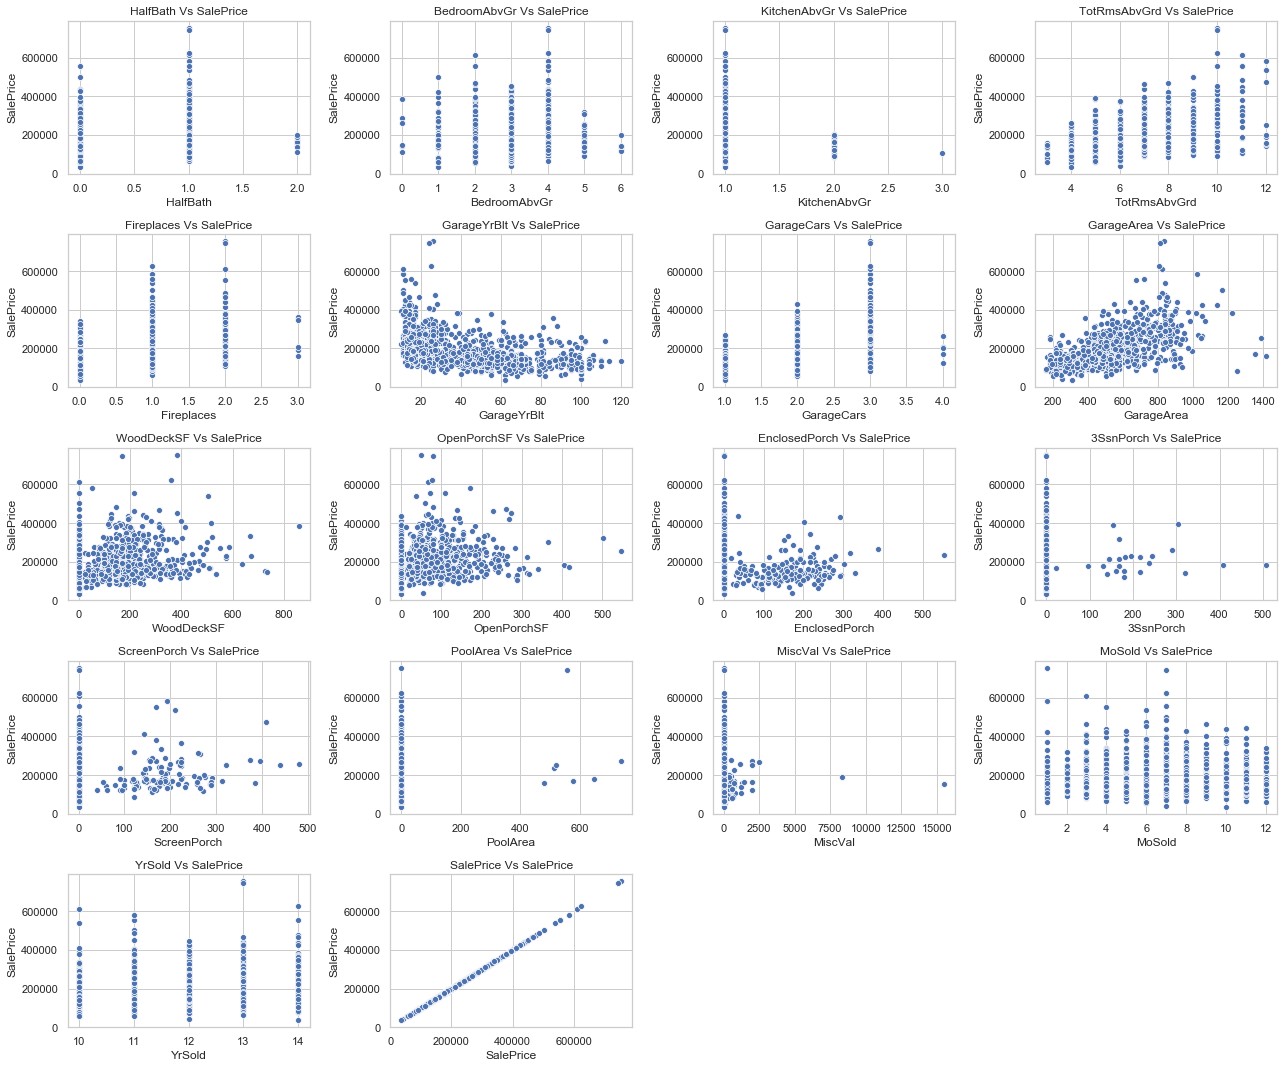

In [913]:
# Now, plot the scatter plot for remaining numeric variables.
j = 0
plt.figure(figsize=(18, 15))
for i in range(len(num_vars)//2, len(num_vars)):
    scatter_plot(num_vars[i], 'SalePrice', house_price_numeric, 5,4, j+1, num_vars[i]+' Vs SalePrice')
    j = j + 1

In [914]:
# # Function for count plot.
def count_plot(item, df, rot = 0, title = ''):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))
    plt.xticks(rotation=rot)
    sns.countplot(x=item, data=df, palette='winter')
    plt.title(title)

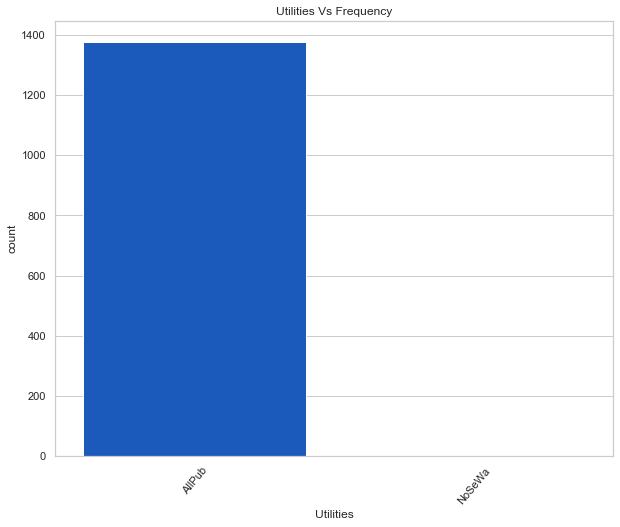

In [915]:
# Plot a count plot of utitlities vs frequency, so that we find that what type of utilities is most preferred by the customers.
count_plot('Utilities', house_price, 50,'Utilities Vs Frequency')
# As we can see that house which have all utilities is most prefered by the customers.

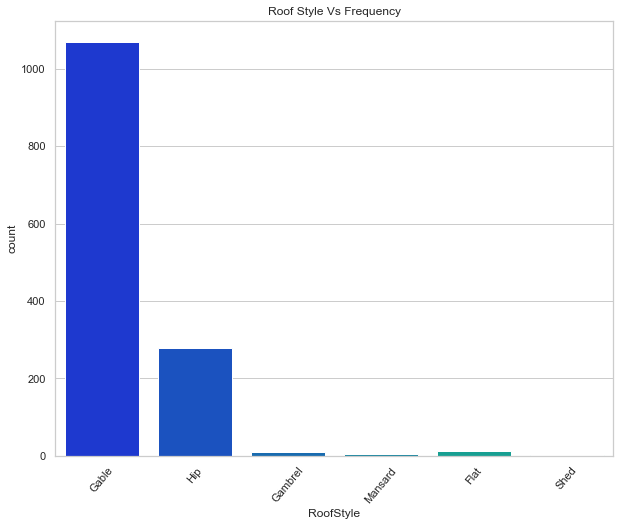

In [916]:
# Plot a count plot of Roof style vs frequency, so that we find that what style of roof is most preferred by the customers.
count_plot('RoofStyle', house_price, 50,'Roof Style Vs Frequency')
# As we can see that house with roof style Gable is most preferred by the customers

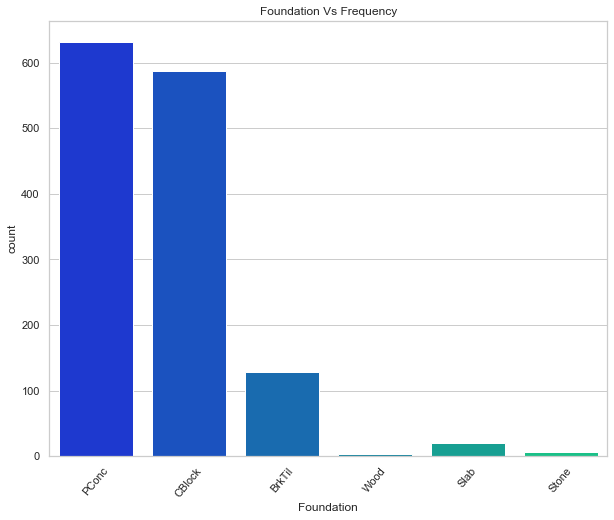

In [917]:
# Plot a count plot of Foundation vs frequency, so that we find that what type of foundation is most preferred by the customers.
count_plot('Foundation', house_price, 50,'Foundation Vs Frequency')
# As we can see that house with Cinder Block and Poured Block is most prefered by the customers.

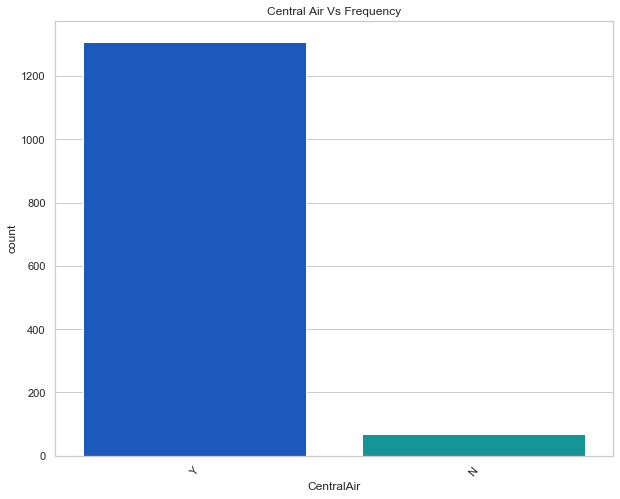

In [918]:
# Plot a count plot of Central Air vs frequency, to find what type of air conditioning is most preferred by the customers.
count_plot('CentralAir', house_price, 50,'Central Air Vs Frequency')
# As we can see that house with central air conditioning is most prefered by the user.

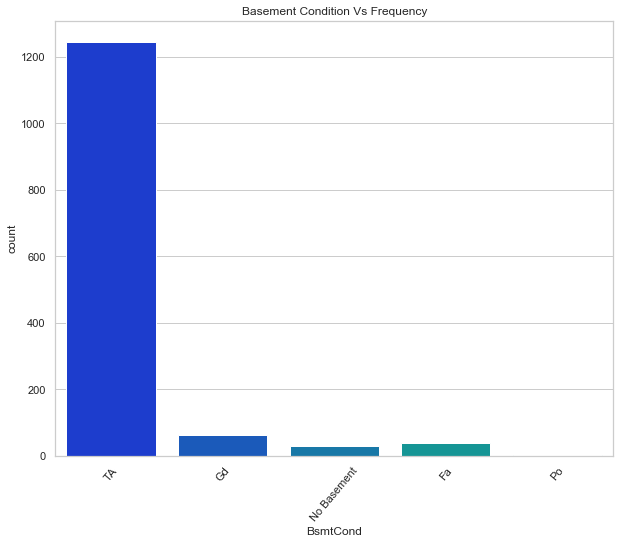

In [919]:
# Plot a count plot of Basement Condition vs frequency, to find what type of basement condition is most preferred by the customers.
count_plot('BsmtCond', house_price, 50,'Basement Condition Vs Frequency')
# As we can see that house with Typical-sight dampness basement is prefered by the customers

In [920]:
# Function to find and drop the outliers in numeric variables of House Price
def pick_and_drop_outliers(house_price_df):
    for cols in num_vars:
        Quantile1 = house_price_df[cols].quantile(0.10)
        Quantile3 = house_price_df[cols].quantile(0.99)
        IQR = Quantile3 - Quantile1
        house_price_df = house_price_df[ ( house_price_df[cols] >= Quantile1 - 1.5 * IQR ) & ( house_price_df[cols] <= Quantile3 + 1.5 * IQR ) ]
        return house_price_df

In [921]:
house_price = pick_and_drop_outliers(house_price)

In [922]:
house_price.shape

(1378, 75)

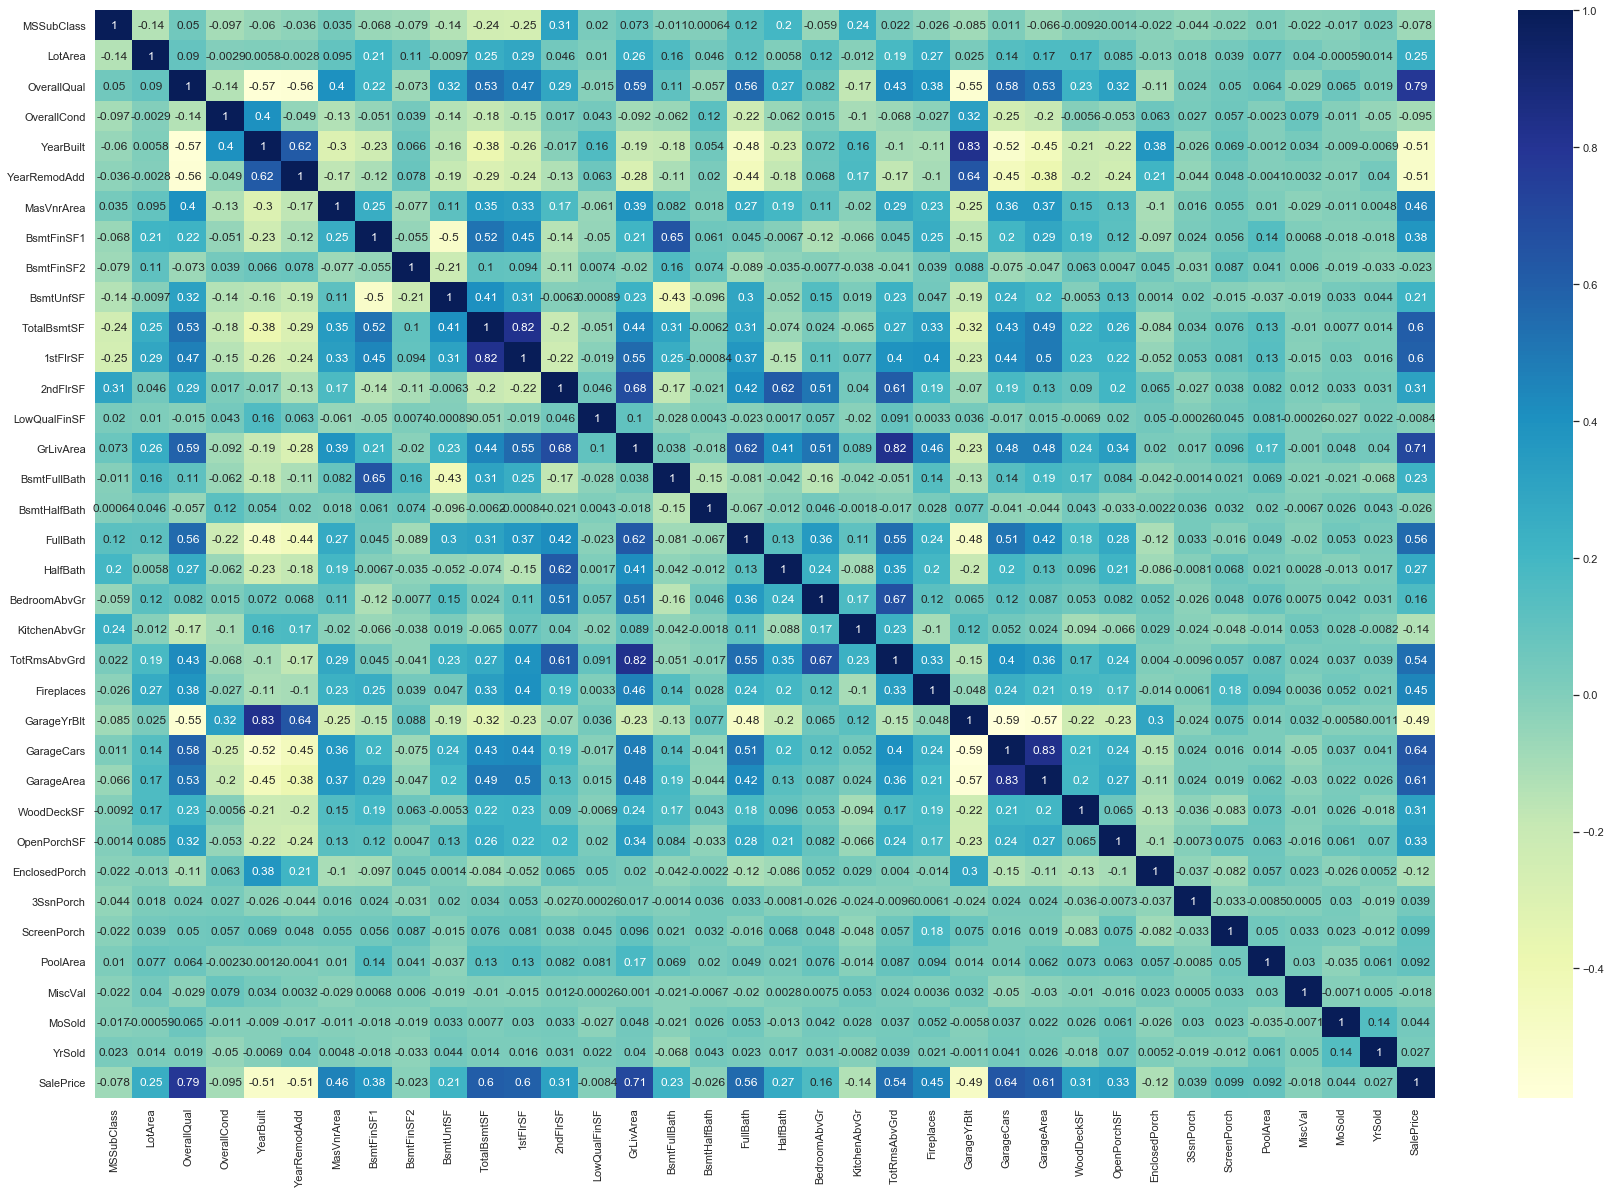

In [923]:
# Let's check the correlation coefficients between numeric variables to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(house_price_numeric[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Preparing the data for modelling
- Encoding
 - Converting binary vars to 0/1
 - other categorical vars to dummy vars
- Splitting into train and test
- Rescalling of variables

In [924]:
house_price.head(20)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,17.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,12,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,44.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,13,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,19.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,12,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,22.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,14,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,20.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,12,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,27,25,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,27.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,11,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,16,15,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,16.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,13,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,47,47,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,47.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,11,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,89,70,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,89.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,12,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,81,70,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,81.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,12,WD,Normal,118000


In [925]:
# We have two variables which has two categories('Street', 'CentralAir'), convert it into 0/1
house_price['Street'] = house_price['Street'].map({'Pave': 1, 'Grvl': 0})
house_price['CentralAir'] = house_price['CentralAir'].map({'Y': 1, 'N': 0})

In [926]:
house_price.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [927]:
house_price.shape

(1378, 75)

In [928]:
# Now, find the columns having datatype is object
house_price_categorical = house_price.select_dtypes(include=['object'])
categorical_vars = house_price_categorical.columns
categorical_vars

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Convert Categorical variables into Dummy variables

In [929]:
# convert the categorival vars into the dummy variables
def dummy_var(xitem, df):
    dum_var = pd.get_dummies(df[xitem], drop_first = True)
    df = pd.concat([df,dum_var], axis = 1)
    return df

In [930]:
for i in range(0, len(categorical_vars)):
    house_price = dummy_var(categorical_vars[i], house_price)

In [931]:
house_price.shape

(1378, 272)

In [932]:
# Drop the old Categorical columns.
house_price = house_price.drop(categorical_vars, axis = 1)
house_price.shape

(1378, 236)

In [933]:
house_price.head(20)

,Id,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,...,Grav,OthW,Wall,Fa,Gd,Po,TA,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,8450,1,7,5,17,17,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,17.0,2,548,0,61,0,0,0,0,0,2,12,208500,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,1,6,8,44,44,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,44.0,2,460,298,0,0,0,0,0,0,5,13,181500,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,1,7,5,19,18,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,19.0,2,608,0,42,0,0,0,0,0,9,12,223500,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,1,7,5,105,50,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,22.0,3,642,0,35,272,0,0,0,0,2,14,140000,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,1,8,5,20,20,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,20.0,3,836,192,84,0,0,0,0,0,12,12,250000,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,6,50,14115,1,5,5,27,25,0.0,732,0,64,796,1,796,566,0,1362,1,0,1,1,1,1,5,0,27.0,2,480,40,30,0,320,0,0,700,10,11,143000,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,7,20,10084,1,8,5,16,15,186.0,1369,0,317,1686,1,1694,0,0,1694,1,0,2,0,3,1,7,1,16.0,2,636,255,57,0,0,0,0,0,8,13,307000,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8,60,10382,1,7,6,47,47,240.0,859,32,216,1107,1,1107,983,0,2090,1,0,2,1,3,1,7,2,47.0,2,484,235,204,228,0,0,0,350,11,11,200000,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,9,50,6120,1,7,5,89,70,0.0,0,0,952,952,1,1022,752,0,1774,0,0,2,0,2,2,8,2,89.0,2,468,90,0,205,0,0,0,0,4,12,129900,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9,10,190,7420,1,5,6,81,70,0.0,851,0,140,991,1,1077,0,0,1077,1,0,1,0,2,2,5,2,81.0,1,205,0,4,0,0,0,0,0,1,12,118000,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Split the data into training and testing sets

In [934]:
y = house_price.pop('SalePrice')
X = house_price

In [935]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=235)

In [936]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=45)

### First try with Ridge Regression

In [937]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [938]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012368,0.003709,0.002195,9.775459e-04,0.0001,{'alpha': 0.0001},-19437.773277,-23496.360789,-21317.715786,-23329.497793,-19534.580538,-21423.185637,1757.947473,28,-12285.720435,-12218.560959,-13205.259846,-12429.454545,-12907.478276,-12609.294812,383.093603
1,0.010571,0.000488,0.001995,6.743496e-07,0.001,{'alpha': 0.001},-19437.573289,-23494.421249,-21317.238017,-23329.074600,-19534.236825,-21422.508796,1757.523048,27,-12285.725665,-12218.501223,-13205.278259,-12429.458270,-12907.528640,-12609.298411,383.118125
2,0.010373,0.000798,0.001994,6.304497e-04,0.01,{'alpha': 0.01},-19435.563597,-23475.403616,-21312.493252,-23324.893103,-19530.802575,-21415.831229,1753.386855,26,-12285.778998,-12217.918852,-13205.460646,-12429.500878,-12908.031298,-12609.338134,383.359013
3,0.009777,0.001936,0.001792,3.980573e-04,0.05,{'alpha': 0.05},-19427.397564,-23398.365108,-21291.996715,-23309.443547,-19515.609136,-21388.562414,1737.385258,25,-12286.036478,-12216.663101,-13206.376580,-12429.797314,-12910.244693,-12609.823633,384.174708
4,0.006183,0.000399,0.001197,3.987317e-04,0.1,{'alpha': 0.1},-19418.180427,-23316.168688,-21267.340483,-23293.198788,-19496.799176,-21358.337512,1721.313802,24,-12286.397113,-12218.830522,-13207.724449,-12430.386507,-12912.967606,-12611.261239,384.460487


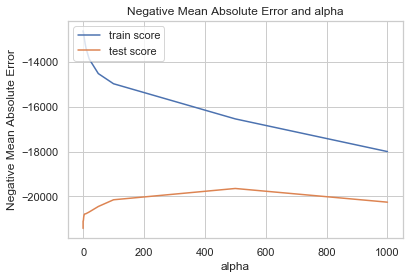

In [939]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [940]:
# Get the value of alpha
model_cv.best_params_

{'alpha': 500}

In [941]:
#Take the value of alpha as 500
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.99568531e+02, -2.93847790e+03,  3.34744653e+03,  1.85637387e+03,
        8.79687871e+03,  2.55967841e+03, -1.47006640e+03, -2.63067416e+03,
        3.32130976e+03,  2.52847866e+03,  7.69403778e+02,  3.33167086e+02,
        3.29409397e+03,  1.05017260e+03,  4.79176151e+03,  4.38179974e+03,
       -4.88277603e+02,  7.24258727e+03,  2.29345569e+03, -9.58614720e+02,
        3.64158308e+03,  2.46200983e+03, -1.82844551e+02, -2.47541244e+03,
        5.52885331e+03,  3.87956810e+03, -2.20355975e+02,  5.09924256e+03,
        3.65663474e+03,  2.17568414e+03,  9.67697812e+02,  1.16397319e+01,
        5.49282895e+02,  1.58024632e+03,  1.57756125e+03, -1.23405875e+02,
       -7.95170722e+01, -5.71606101e+02,  7.80773171e+02,  1.64742492e+02,
        1.28711988e+03, -1.16923863e+03,  6.97774948e+02, -1.92936894e+03,
       -3.43811399e+02,  1.32348892e+03,  2.18248499e+02,  1.15569572e+03,
       -9.94281856e+02,  2.69356015e+03, -6.69367481e+02, -5.28068259e+02,
       -1.88321337e+02,  

In [942]:
# Now, find the r2 value of X_train and X_train_pred for ridge regression
y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_train,y_train_pred)

0.8663998480749376

In [943]:
# Now, find the r2 value of X_test and X_test_pred for ridge regression
y_test_pred = ridge.predict(X_test)
metrics.r2_score(y_test,y_test_pred)

0.8698209361284687

### Now, Lets try with Lasso Regression

In [944]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   15.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [945]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.135038,0.013028,0.001397,0.000489,0.0001,{'alpha': 0.0001},-19453.457280,-23233.254783,-21290.746764,-23475.997667,-19518.125279,-21394.316354,1732.792266,28,-12284.643609,-12221.722392,-13205.778616,-12423.590387,-12907.701605,-12608.687322,383.388736
1,0.139031,0.011943,0.001995,0.001093,0.001,{'alpha': 0.001},-19453.452447,-23233.131481,-21290.717914,-23475.866589,-19518.079817,-21394.249650,1732.745874,27,-12284.639105,-12221.724473,-13205.777742,-12423.585960,-12907.697625,-12608.684981,383.388612
2,0.118483,0.010080,0.001197,0.000399,0.01,{'alpha': 0.01},-19453.404174,-23231.898204,-21290.427526,-23474.555809,-19517.625219,-21393.582186,1732.281914,26,-12284.608138,-12221.746558,-13205.772254,-12423.547345,-12907.663121,-12608.667483,383.386026
3,0.115511,0.009199,0.001397,0.000489,0.05,{'alpha': 0.05},-19453.190434,-23226.407665,-21289.921824,-23468.730483,-19515.784096,-21390.806900,1730.170077,25,-12284.494360,-12221.856533,-13205.747647,-12423.404008,-12907.513656,-12608.603241,383.365939
4,0.137335,0.006162,0.001396,0.000488,0.1,{'alpha': 0.1},-19452.928442,-23219.527844,-21289.303215,-23461.448962,-19511.095029,-21386.860699,1728.044769,24,-12284.351396,-12221.999536,-13205.719215,-12423.232354,-12907.290810,-12608.518662,383.334257


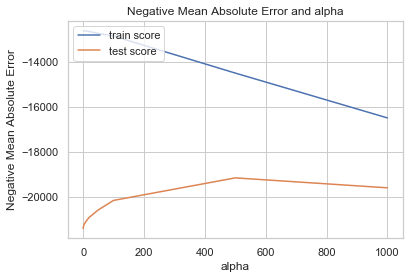

In [946]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [947]:
# Find the value of alpha
model_cv.best_params_

{'alpha': 500}

In [948]:
alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [949]:
# Now, find the r2 value of X_train and X_train_pred for Lasso regression
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

0.904731267696594


In [950]:
# Now, find the r2 value of X_test and X_test_pred for lasso regression
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))

0.8671924060021682


In [951]:
# Now, find the first five best lasso coefficients 
lasso_params = list(lasso.coef_)
lasso_params.insert(0,lasso.intercept_)
cols = df_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,lasso_params)))
lasso_coef.columns = ['Features','Coefficients']
lasso_coef.sort_values(by='Coefficients',ascending=False).head(6)

,Features,Coefficients
0,Id,185671.453099
111,CompShg,29977.866449
18,BsmtFullBath,24825.590363
115,Tar&Grv,17253.587201
117,WdShngl,16042.731787
5,OverallCond,13884.847558


In [952]:
# Now, find the first five best RIDGE coefficients 
ridge_params = list(ridge.coef_)
ridge_params.insert(0,ridge.intercept_)
cols = df_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_params)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(6)

,Features,Coefficients
0,Id,185530.549727
5,OverallCond,8796.878715
18,BsmtFullBath,7242.587274
71,NridgHt,6928.433437
25,Fireplaces,5528.853310
28,GarageArea,5099.242561


### Now double the value of alpha for both lasso and ridge regression

### For Lasso Regression

In [953]:
alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [954]:
# Now, find the r2 value of X_train and X_train_pred for Lasso regression
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

0.8733741711369596


In [955]:
# Now, find the r2 value of X_test and X_test_pred for lasso regression
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))

0.8750415549576738


### For Ridge Regression

In [956]:
#Take the value of alpha as 500
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [957]:
# Now, find the r2 value of X_train and X_train_pred for ridge regression
y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_train,y_train_pred)

0.840065537464366

In [958]:
# Now, find the r2 value of X_test and X_test_pred for ridge regression
y_test_pred = ridge.predict(X_test)
metrics.r2_score(y_test,y_test_pred)

0.8516776783497063

In [959]:
# Now, find the first five best RIDGE coefficients 
ridge_params = list(ridge.coef_)
ridge_params.insert(0,ridge.intercept_)
cols = df_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_params)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(6)

,Features,Coefficients
0,Id,185311.947280
5,OverallCond,7221.200873
18,BsmtFullBath,6267.070163
71,NridgHt,5411.156777
25,Fireplaces,4952.093603
15,2ndFlrSF,4478.131660


In [960]:
# Now, find the first five best lasso coefficients 
lasso_params = list(lasso.coef_)
lasso_params.insert(0,lasso.intercept_)
cols = df_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,lasso_params)))
lasso_coef.columns = ['Features','Coefficients']
lasso_coef.sort_values(by='Coefficients',ascending=False).head(6)

,Features,Coefficients
0,Id,185677.980610
18,BsmtFullBath,23459.691183
5,OverallCond,17621.258277
71,NridgHt,10892.324183
28,GarageArea,8322.003524
77,StoneBr,6319.627294
